In [1]:
import os, sys
sys.path.append("..")

In [2]:
import numpy as np
from opttrot.hamiltonian import Hamiltonian
from qiskit.quantum_info import SparsePauliOp
from rustworkx import visualization as vi

def get_test_hermit(qubits, tol= 0.5):
    ndim = int(2**qubits)
    A = np.random.rand(ndim, ndim)
    B = np.random.rand(ndim, ndim)
    A[A<tol] = 0.
    B[B<tol] = 0.
    H1 = A + 1j*A
    H2 = B + 1j*B
    H = H1.conj().T@H1 + H2.conj().T@H2
    return H/(ndim)

In [7]:
# Sample Hamiltonian
qubit = 4
H = get_test_hermit(qubit, tol=0.7)
H = H  + 1j*H 

In [8]:
hamiltonian = Hamiltonian.from_matrix(H)

In [3]:
hamiltonian.poly

NameError: name 'hamiltonian' is not defined

In [6]:
g = hamiltonian.to_graph()

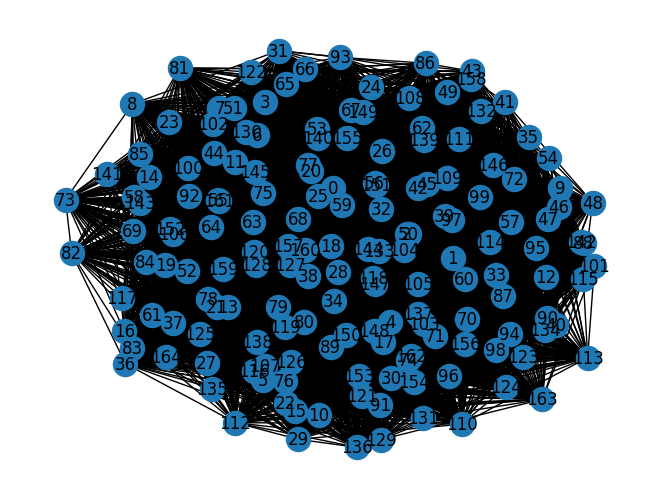

In [10]:
vi.mpl_draw(g, with_labels=True)

In [ ]:
max_solver = MaxCliqueSolver()

In [9]:
com_group = hamiltonian.get_commuting_group(solver=None) 
# If the solver is none then the default greedy method is selected. 

In [10]:
print("Commuting partition=================\n")
for i in range(10):
    print(com_group[i])

Commuting partition=================

[88, 43, 65, 24, 76, 57, 171, 114, 149, 0]
[8, 29, 26, 12, 32, 23, 4, 21, 17, 19]
[98, 113, 121, 85, 102, 118, 37, 109, 28, 25, 35]
[140, 156, 133, 124, 100, 74, 67, 46, 38, 55, 18]
[49, 86, 87, 163, 125, 139, 75, 136, 3, 126]
[82, 112, 44, 106, 79, 155, 131, 61]
[142, 159, 165, 135, 20, 30, 36, 42, 27]
[15, 134, 14, 64, 63, 71, 1, 70]
[72, 77, 52, 31, 66]
[84, 83, 34, 33, 69, 68, 48, 47]


In [7]:
spa = SparsePauliOp.from_operator(H)

In [8]:
spa.group_commuting()

[SparsePauliOp(['IX', 'XI', 'XX', 'II'],
               coeffs=[0.35601036+0.35601036j, 0.31879968+0.31879968j, 0.13711938+0.13711938j,
  0.87360013+0.87360013j]),
 SparsePauliOp(['IZ', 'XZ'],
               coeffs=[0.01759786+0.01759786j, 0.31879968+0.31879968j]),
 SparsePauliOp(['YY', 'ZX'],
               coeffs=[ 0.13711938+0.13711938j, -0.02451113-0.02451113j]),
 SparsePauliOp(['ZI', 'ZZ'],
               coeffs=[-0.24642446-0.24642446j, -0.01885529-0.01885529j])]

In [9]:
hamiltonian

Hamiltonian(terms:10)[
((0.8736001307876311+0.8736001307876311j), 'II'),
((0.35601036491204374+0.35601036491204374j), 'IX'),
((0.318799681803406+0.318799681803406j), 'XI'),
((0.13711937720535802+0.13711937720535802j), 'XX'),
((0.017597858028866487+0.017597858028866487j), 'IZ'),
((0.318799681803406+0.318799681803406j), 'XZ'),
((-0.24642446455065958-0.24642446455065958j), 'ZI'),
((-0.024511133630083892-0.024511133630083892j), 'ZX'),
((0.13711937720535802+0.13711937720535802j), 'YY'),
((-0.018855286378890113-0.018855286378890113j), 'ZZ')
]

In [10]:
hamiltonian.local_decomposition

,Pstring,type,Z,X,Coef
0,II,0,0,0,0.873600+0.873600j
1,IX,2,0,1,0.356010+0.356010j
2,XI,2,0,2,0.318800+0.318800j
3,XX,2,0,3,0.137119+0.137119j
4,IZ,1,1,0,0.017598+0.017598j
5,XZ,3,1,2,0.318800+0.318800j
6,ZI,1,2,0,-0.246424-0.246424j
7,ZX,3,2,1,-0.024511-0.024511j
8,YY,3,3,3,0.137119+0.137119j
9,ZZ,1,3,0,-0.018855-0.018855j


In [11]:
parr = hamiltonian.poly
parr[-5:]

array([PauliElement(n=2, weight=0.318800+(0.318800)j, XZ),
       PauliElement(n=2, weight=-0.246424+(-0.246424)j, ZI),
       PauliElement(n=2, weight=-0.024511+(-0.024511)j, ZX),
       PauliElement(n=2, weight=0.137119+(0.137119)j, YY),
       PauliElement(n=2, weight=-0.018855+(-0.018855)j, ZZ)], dtype=object)

In [12]:
parr[0]

PauliElement(n=2, weight=0.873600+(0.873600)j, II)

In [13]:
parr

array([PauliElement(n=2, weight=0.873600+(0.873600)j, II),
       PauliElement(n=2, weight=0.356010+(0.356010)j, IX),
       PauliElement(n=2, weight=0.318800+(0.318800)j, XI),
       PauliElement(n=2, weight=0.137119+(0.137119)j, XX),
       PauliElement(n=2, weight=0.017598+(0.017598)j, IZ),
       PauliElement(n=2, weight=0.318800+(0.318800)j, XZ),
       PauliElement(n=2, weight=-0.246424+(-0.246424)j, ZI),
       PauliElement(n=2, weight=-0.024511+(-0.024511)j, ZX),
       PauliElement(n=2, weight=0.137119+(0.137119)j, YY),
       PauliElement(n=2, weight=-0.018855+(-0.018855)j, ZZ)], dtype=object)

In [17]:
from scipy.sparse import coo_matrix
import opttrot

In [24]:
import importlib
importlib.reload(opttrot)
from opttrot.pauli_utils import ij_code2_pstr, ij_code2sym_code

In [25]:
hmat = hamiltonian.coef_matrix
hmat.shape

(4, 4)

In [26]:
for i in range(4):
    for j in range(4):
        print(f"{hmat[i,j].real:.5}\t", end="")
    print("")

1.0121	0.15861	0.0	0.50323	
0.0	0.011998	0.0	0.0	
0.0	2.7756e-17	-0.08392	-0.15861	
-0.1727	0.0	0.0	0.025152	


In [27]:
coo = coo_matrix(hamiltonian.coef_matrix)

In [28]:
for i,j, d, in zip(coo.row, coo.col, coo.data):
    print(i, j, ij_code2_pstr((i, j), 2), ij_code2sym_code(i, j))

0 0 II (0, 0)
0 1 IX (1, 0)
0 3 XX (3, 0)
1 1 IZ (0, 1)
2 1 YX (3, 2)
2 2 ZI (0, 2)
2 3 ZX (1, 2)
3 0 YY (3, 3)
3 3 ZZ (0, 3)


In [31]:
(3&0)^(0&3)

0

In [76]:
from scipy.sparse import coo_matrix
coo = coo_matrix(hamiltonian._coef_matrix)

In [26]:
coo.row, np.bitwise_xor(coo.row, coo.col)

(array([0, 1, 2, 3], dtype=int32), array([0, 0, 0, 0], dtype=int32))

In [27]:
coo.col

array([0, 1, 2, 3], dtype=int32)

In [28]:
nx_s = np.bitwise_xor(coo.row, coo.col)
nz_s = coo.col
# II, IY, YI, YY, IZ, YZ, ZY, XX, ZZ
nx_s, nz_s

(array([0, 0, 0, 0], dtype=int32), array([0, 1, 2, 3], dtype=int32))

In [29]:
coo.row, coo.col

(array([0, 1, 2, 3], dtype=int32), array([0, 1, 2, 3], dtype=int32))

In [30]:
nx = 1
nz = 0
np.bitwise_and(nx_s, nz), np.bitwise_and(nz_s, nx), 

(array([0, 0, 0, 0], dtype=int32), array([0, 1, 0, 1], dtype=int32))

In [34]:
hamiltonian.commute(parr[1])

array([0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int32)

In [32]:
# Adj matrix
l = len(parr)
adj = np.zeros((l,l))
for i in range(l):
    adj[i, i] = 1  # Diagonal elements
    for j in range(i + 1, l):
        commute_value = parr[i].commute(parr[j])
        adj[i, j] = commute_value
        adj[j, i] = commute_value  # Symmetric assignment


In [33]:
adj

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 0., 0., 0., 0.],
       [1., 1., 0., 1., 0., 1., 1., 0., 1.],
       [1., 1., 0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0., 1., 0., 0., 1.]])

In [30]:
l = len(parr)
adj = np.zeros((l, l))

# Extract upper triangle indices
upper_indices = np.triu_indices(l, k=1)

# Loop over only necessary elements and fill symmetrically
for idx in range(len(upper_indices[0])):
    i, j = upper_indices[0][idx], upper_indices[1][idx]
    commute_value = parr[i].commute(parr[j])
    adj[i, j] = commute_value
    adj[j, i] = commute_value

# Set diagonal elements to 1
np.fill_diagonal(adj, 1)

In [31]:
l = len(parr)
adj = np.zeros((l, l))

# Loop over the upper triangle only, including the diagonal
for i in range(l):
    for j in range(i, l):  # Start j from i to avoid unnecessary computations
        if i == j:
            adj[i, j] = 1  # Set diagonal elements to 1 directly
        else:
            commute_value = parr[i].commute(parr[j])
            adj[i, j] = commute_value
            adj[j, i] = commute_value  # Fill the symmetric element


In [28]:
adj

array([[1., 0., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 1., 1., 1.]])

## Graph tool test

In [35]:
import rustworkx as rx

In [36]:
G = rx.PyGraph()

In [37]:
nodes = hamiltonian.local_decomposition["Pstring"].to_list()
edge_list = hamiltonian.edge_df[hamiltonian.edge_df["commute"] == 1]["index"].tolist()

In [38]:
G.add_nodes_from(nodes)
G.add_edges_from_no_data(edge_list)

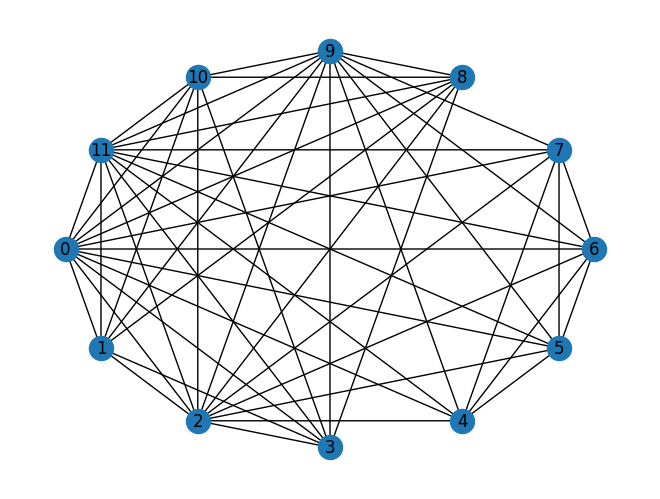

In [34]:
layout = rx.shell_layout(G)
rx.visualization.mpl_draw(G, pos=layout, with_labels=True)

In [27]:
series = hamiltonian.edge_df[hamiltonian.edge_df["commute"] ==1][["source", "target", "commute"]]

In [28]:
series.values

array([['III', 'IIZ', 1],
       ['III', 'ZIZ', 1],
       ['III', 'IIY', 1],
       ['III', 'IYI', 1],
       ['III', 'IYZ', 1],
       ['III', 'ZYZ', 1],
       ['III', 'IYY', 1],
       ['III', 'YII', 1],
       ['III', 'YIZ', 1],
       ['III', 'XIX', 1],
       ['III', 'YIY', 1],
       ['III', 'YYI', 1],
       ['III', 'YYZ', 1],
       ['III', 'XYX', 1],
       ['III', 'YYY', 1],
       ['IIZ', 'ZIZ', 1],
       ['IIZ', 'IYI', 1],
       ['IIZ', 'IYZ', 1],
       ['IIZ', 'ZYZ', 1],
       ['IIZ', 'YII', 1],
       ['IIZ', 'YIZ', 1],
       ['IIZ', 'YYI', 1],
       ['IIZ', 'YYZ', 1],
       ['ZIZ', 'IYI', 1],
       ['ZIZ', 'IYZ', 1],
       ['ZIZ', 'ZYZ', 1],
       ['ZIZ', 'XIX', 1],
       ['ZIZ', 'YIY', 1],
       ['ZIZ', 'XYX', 1],
       ['ZIZ', 'YYY', 1],
       ['IIY', 'IYI', 1],
       ['IIY', 'IYY', 1],
       ['IIY', 'YII', 1],
       ['IIY', 'YIY', 1],
       ['IIY', 'YYI', 1],
       ['IIY', 'YYY', 1],
       ['IYI', 'IYZ', 1],
       ['IYI', 'ZYZ', 1],
       ['IYI

In [24]:
from networkx.algorithms import find_cliques

In [25]:
g = hamiltonian.compatible_graph

In [ ]:
g.solve_clique(core = "quera")

In [26]:
list(find_cliques(g))

[['YII', 'III', 'IZZ', 'YZZ', 'YIZ', 'IIZ'],
 ['YII', 'III', 'IZZ', 'YZZ', 'IXX', 'YXX', 'IYY', 'YYY'],
 ['YII', 'III', 'IYI', 'YYI', 'YIY', 'YYY', 'IYY', 'IIY'],
 ['YII', 'III', 'IYI', 'YYI', 'IYZ', 'YYZ', 'YIZ', 'IIZ'],
 ['YII', 'III', 'IXX', 'YXX', 'IYZ', 'YYZ']]

In [26]:
hamiltonian.edge_df[hamiltonian.edge_df["commute"]==1]

,source,target,Zs,Xs,Zt,Xt,commute
0,III,IXX,0,0,0,3,1
1,III,XII,0,0,0,4,1
2,III,XXI,0,0,0,6,1
3,III,IIZ,0,0,1,0,1
4,III,IXY,0,0,1,3,1
...,...,...,...,...,...,...,...
368,YZI,ZYX,6,4,6,3,1
370,YZI,YZZ,6,4,7,4,1
371,YZI,ZYY,6,4,7,3,1
372,ZYX,YYZ,6,3,7,6,1


In [23]:
hamiltonian.edge_df["commute"]==1

0       True
1       True
2       True
3       True
4       True
       ...  
373    False
374    False
375    False
376     True
377    False
Name: commute, Length: 378, dtype: bool